In [1]:
import pandas as pd
dataset=pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
input=dataset[['Pclass','Sex','Age','Fare']]

In [34]:
input.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [36]:
map1={'male':1,'female':0}
input['Sex']= input['Sex'].map(map1)

C:\Users\Hashir\AppData\Local\Temp\ipykernel_19880\3933988349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Sex']= input['Sex'].map(map1)


In [37]:
input.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [38]:
target=dataset['Survived']

In [39]:
target.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [45]:

input

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [43]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [47]:
input.columns[(input.isna().any())]

Index(['Age'], dtype='object')

In [48]:
input['Age']=input['Age'].fillna(input['Age'].mean())

C:\Users\Hashir\AppData\Local\Temp\ipykernel_19880\2420109743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Age']=input['Age'].fillna(input['Age'].mean())


In [49]:
input['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [51]:

x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

model.fit(x_train,y_train)


GaussianNB()

In [52]:
predictions=model.predict(x_test)

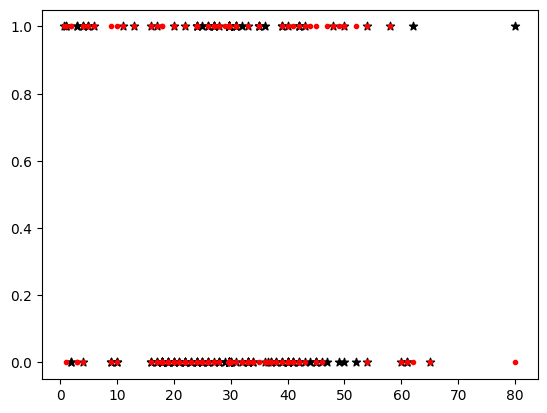

In [58]:
import matplotlib.pyplot as plt
plt.scatter(x_test['Age'],y_test,marker='*',color='Black')
plt.scatter(x_test['Age'],predictions,marker='.',color='Red')